In [22]:
import sklearn as sk
import numpy as np
import pandas as pd
from urllib import request
import matplotlib.pyplot as plt
from sklearn import model_selection
import tarfile
import os
%matplotlib inline

In [13]:
housing_dir = "cal_house_data"
URL = r"https://raw.githubusercontent.com/ageron/handson-ml2/master/"
URl = URL +  "datasets/housing/housing.tgz"
def fetch_data(dir=housing_dir, url=URl):
    if not os.path.isdir(dir):
        os.makedirs(dir)
    tgz_path = os.path.join(dir, "housing.tgz")
    request.urlretrieve(url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=dir)
    housing_tgz.close()

In [15]:
fetch_data()


In [16]:
housing_data = pd.read_csv(os.path.join(housing_dir, "housing.csv"))

In [17]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [20]:
housing_data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

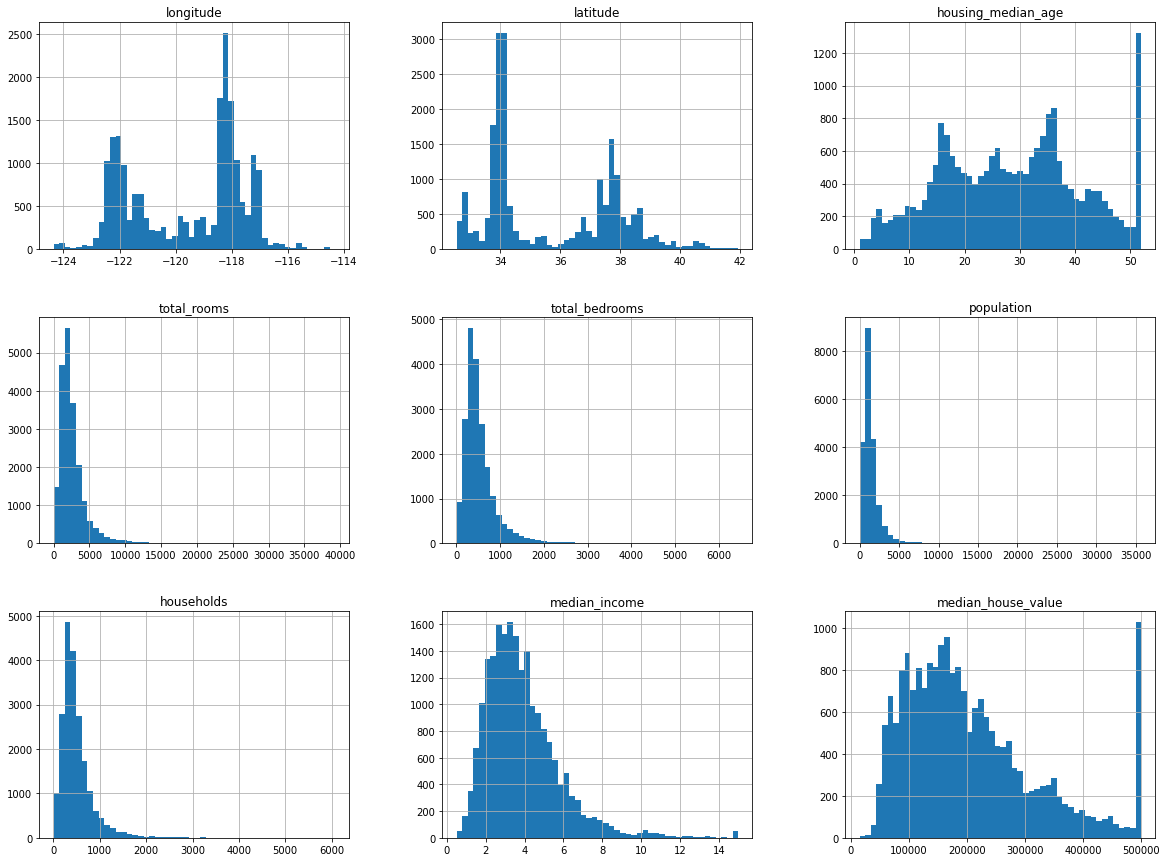

In [23]:
housing_data.hist(bins=50, figsize=(20, 15))
plt.show()

In [24]:
train_set, test_set = model_selection.train_test_split(housing_data,
                                                       test_size=0.2,
                                                       random_state=42)
test_set.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<AxesSubplot:>

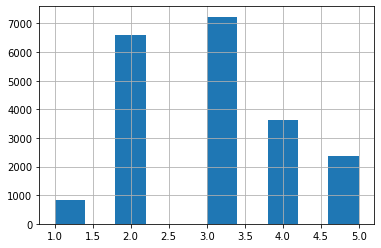

In [25]:
housing_data["income_cat"] = pd.cut(housing_data["median_income"],
                                    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                    labels=[1, 2, 3, 4, 5])
housing_data["income_cat"].hist()

In [26]:
housing = housing_data.copy()

split = model_selection.StratifiedShuffleSplit(n_splits=1,
                                               test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing.loc[train_idx]
    strat_test_set = housing.loc[test_idx]

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)



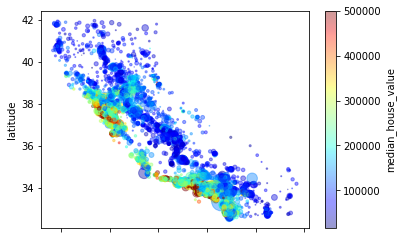

In [27]:
"Geographical Plot"
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude",
             s=housing["population"]/100, c="median_house_value", alpha=0.4,
             cmap=plt.get_cmap("jet"))
plt.show()

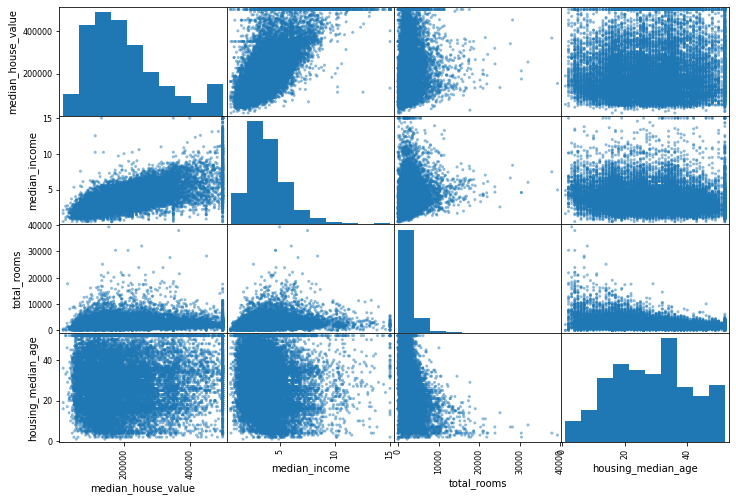

In [29]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

In [39]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
#col ids

rooms_id, bedrooms_id, population_id, households_id = 3, 4, 5, 6

class CombineAttributes(BaseEstimator, TransformerMixin):
    def __init__(self, include_bedrooms_per_room=True):
        self.include_bedrooms_per_room = include_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_id] / X[:, households_id]
        population_per_household = X[:, population_id] / X[:, households_id]
        if self.include_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_id] / X[:, rooms_id]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

housing_num = housing.drop("ocean_proximity", axis=1)


In [41]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("combine_attr", CombineAttributes()),
    ("scaler", StandardScaler()),
])


In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_attr = list(housing_num)
cat_attr = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num_pipeline", num_pipeline, num_attr),
    ("cat_pipeline", OneHotEncoder(), cat_attr),
])
housing_final_dataset = full_pipeline.fit_transform(housing)

In [52]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgb_reg = xgb.XGBRegressor(objective="reg:squarederror")
xgb_reg.fit(housing_final_dataset, housing_labels)

preds = xgb_reg.predict(housing_final_dataset)
tree_rmse = np.sqrt(mean_squared_error(housing_labels, preds))
tree_rmse


26920.763818847765

In [54]:
print(xgb_reg.get_params())

{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 8, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': 1}


In [55]:
data_dmatrix = xgb.DMatrix(data=housing_final_dataset, label=housing_labels)
params = {"objective":"reg:linear",'colsample_bytree': 0.4,'learning_rate': 0.1,
                'max_depth': 10 , 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=xgb_reg.get_params(), nfold=10,
                    num_boost_round=100,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[09:28:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "importance_type", "missing", "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:28:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "importance_type", "missing", "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:28:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "importance_type", "missing", "n_estimat